In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
oliv=datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\lkkma\scikit_learn_data


In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oliv['data'].shape

(400, 4096)

In [6]:
oliv['images'].shape

(400, 64, 64)

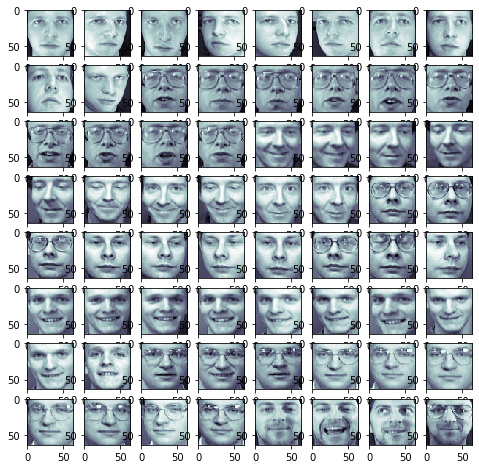

In [9]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()

In [10]:
x=oliv.data
y=oliv.target


In [11]:
pca=PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.components_.shape

(400, 4096)

In [15]:
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total<0.95:
    current_variance+=pca.explained_variance_[k]
    k=k+1
k

123

In [17]:
pca=PCA(n_components=k,whiten=True)
transformed_data=pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [18]:
x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [19]:
x_approx_images=x_approx.reshape((400,64,64))

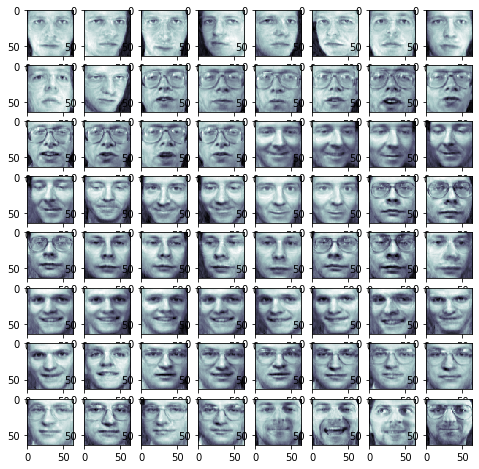

In [20]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

In [21]:
eigvec=pca.components_
eigvec.shape

(123, 4096)

In [22]:
eigenfaces=eigvec.reshape((123,64,64))

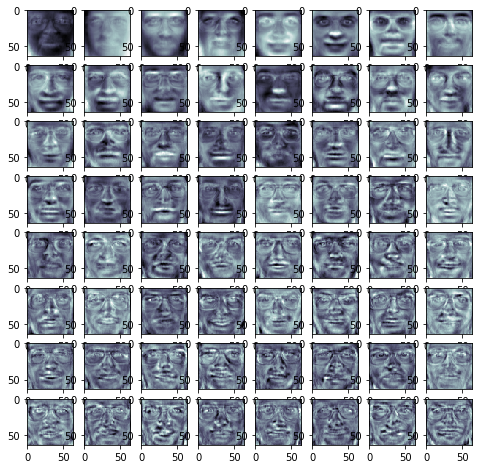

In [23]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time

In [3]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [4]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
lfw.data.shape

(1140, 1850)

In [6]:
lfw.images.shape

(1140, 50, 37)

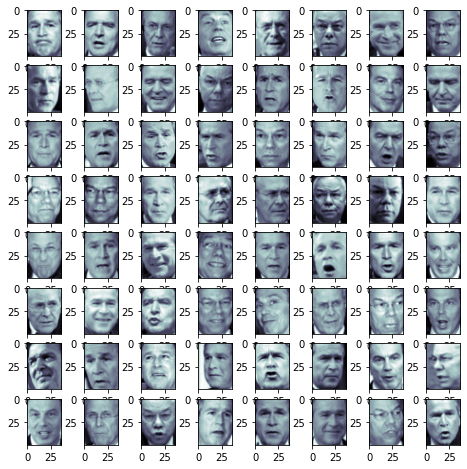

In [7]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()

In [8]:
x,y=lfw.data,lfw.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pca=PCA()
pca.fit(x_train)
print(x_train.shape)
print(x_test.shape)

(855, 1850)
(285, 1850)


In [ ]:
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total<0.99:
    current_variance+=pca.explained_variance_[k]
    k=k+1
k

In [ ]:
pca_lfw=PCA(n_components=k,whiten=True)
x_transformed=pca_lfw.fit_transform(x_train)
x_transformed.shape



In [20]:
x_approx=pca_lfw.inverse_transform(x_transformed)
x_approx.shape

(855, 1850)

In [24]:
x_approx_images=x_approx.reshape((855,50,37))

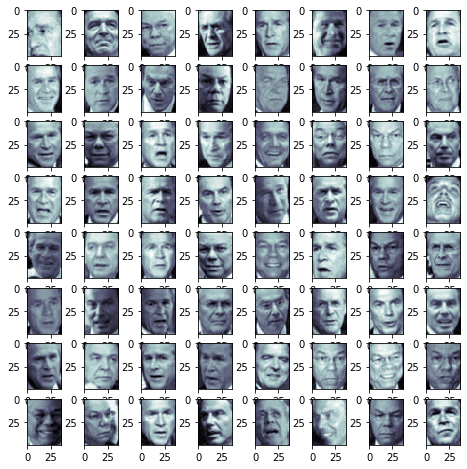

In [25]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

In [26]:
eigvec=pca_lfw.components_
eigenfaces=eigvec.reshape((k,50,37))

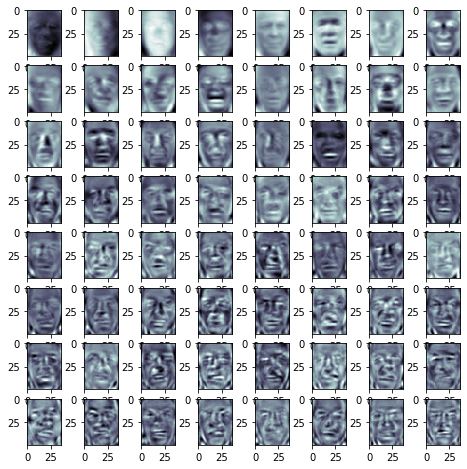

In [27]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()

In [30]:
x_train_pca=x_transformed
x_test_pca=pca_lfw.transform(x_test)

In [37]:
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

4.202017545700073
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        61
           1       0.88      0.19      0.32        36
           2       0.58      0.98      0.73       122
           3       1.00      0.16      0.28        31
           4       0.67      0.17      0.27        35

    accuracy                           0.64       285
   macro avg       0.78      0.44      0.47       285
weighted avg       0.71      0.64      0.57       285

[[ 44   0  17   0   0]
 [  8   7  21   0   0]
 [  3   0 119   0   0]
 [  0   1  22   5   3]
 [  3   0  26   0   6]]


In [38]:
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

2.0009727478027344
              precision    recall  f1-score   support

           0       0.69      0.15      0.24        61
           1       1.00      0.06      0.11        36
           2       0.45      1.00      0.62       122
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        35

    accuracy                           0.47       285
   macro avg       0.43      0.24      0.19       285
weighted avg       0.47      0.47      0.33       285

[[  9   0  52   0   0]
 [  2   2  32   0   0]
 [  0   0 122   0   0]
 [  1   0  30   0   0]
 [  1   0  34   0   0]]


C:\Users\lkkma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
